In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [59]:
X.shape,y.shape

((506, 13), (506,))

In [60]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

(506, 14)

In [61]:
# X - Matrix (m*n)
# x - Vector(Single Example with n feature)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ =+ (theta[i]*x[i])
    return y_


def error(X,y,theta):
    e = 0.0
    m = X.shape[0]

    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] -y_)**2

    return e/m

def gradient(X,y,theta):
    m,n = X.shape

    grad = np.zeros((n,))

    # for all values of j
    for j in range(n):
        # sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]

    # Out of loops
    return grad/m

    

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []

    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)

        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]

    return theta,error_list
    


In [63]:
import time 
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time Taken is ", end-start)

C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:18: RuntimeWarning: overflow encountered in scalar add
  e += (y[i] -y_)**2
C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:18: RuntimeWarning: overflow encountered in scalar power
  e += (y[i] -y_)**2
C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:32: RuntimeWarning: overflow encountered in scalar add
  grad[j] += (y_ - y[i])*X[i][j]
C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:51: RuntimeWarning: invalid value encountered in scalar subtract
  theta[j] = theta[j] - learning_rate*grad[j]
C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:8: RuntimeWarning: invalid value encountered in scalar multiply
  y_ =+ (theta[i]*x[i])
C:\Users\anmol\AppData\Local\Temp\ipykernel_16244\3417145165.py:32: RuntimeWarning: invalid value encountered in scalar multiply
  grad[j] += (y_ - y[i])*X[i][j]


Time Taken is  17.235082864761353


In [64]:
error_list

[592.1469169960473,
 107651.89164998662,
 43358272.27071277,
 17515996263.694668,
 7076214246223.168,
 2858690321311027.0,
 1.1548703966805786e+18,
 4.6655128160844186e+20,
 1.88480109106723e+23,
 7.614329427283983e+25,
 3.0760812322309295e+28,
 1.2426932453667845e+31,
 5.0203046847375907e+33,
 2.02813198040353e+36,
 8.19336591749217e+38,
 3.310003772267602e+41,
 1.337194638046782e+44,
 5.40207692511505e+46,
 2.1823625577415403e+49,
 8.816435603294841e+51,
 3.5617150995976246e+54,
 1.4388824488164831e+57,
 5.812881276624307e+59,
 2.34832169673918e+62,
 9.486887016860703e+64,
 3.8325679737854137e+67,
 1.5483031733781827e+70,
 6.25492550449193e+72,
 2.526901303275153e+75,
 1.020832333160184e+78,
 4.124018025850835e+80,
 1.6660448660449924e+83,
 6.730585264845501e+85,
 2.7190611087739938e+88,
 1.0984621726528244e+91,
 4.437631581193919e+93,
 1.792740300091665e+96,
 7.24241687208307e+98,
 2.925833828042548e+101,
 1.1819954223176278e+104,
 4.77509407741904e+106,
 1.9290703684362618e+109,
 7

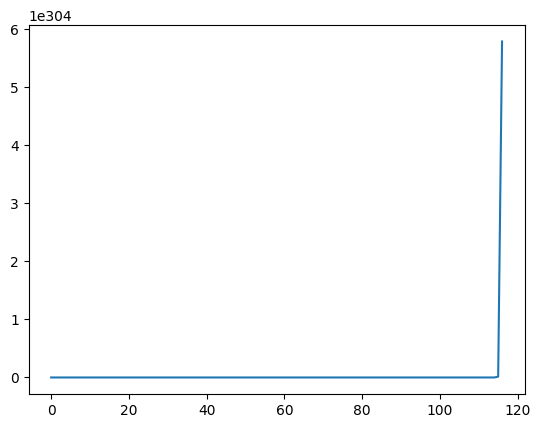

In [65]:
plt.plot(error_list)
plt.show()

# Prediction

In [66]:
y_ = []
m = X.shape[0]
for i in range(m):
  pred = hypothesis(X[i],theta)
  y_.append(pred)

y_ = np.array(y_)

In [67]:
def r2_score(y,y_):
  num = np.sum((y-y_)**2)
  demon = np.sum((y-y.mean())**2)
  score = (1- num/demon)
  return score*100

In [68]:
# Score
r2_score(y,y_)

nan

# Optimising Code using Vectorization